In [1]:
from util import bullish_sequence, bullish_candlestick_patterns, time_formatter
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from src.asset_selector import AssetSelector
from src.indicators import Indicators
from src.predictor import Predictor
from sklearn.cluster import KMeans
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import configparser
import requests
import json
import time
import sys
import os

config = configparser.ConfigParser()
try:
    config.read(os.path.relpath("config.ini"))
except FileExistsError as e:
    print("FileExistsError: {}".format(e))
    sys.exit(1)
alpaca_api = tradeapi.REST(
    base_url    = config["alpaca"]["APCA_API_BASE_URL"],
    key_id      = config["alpaca"]["APCA_API_KEY_ID"],
    secret_key  = config["alpaca"]["APCA_API_SECRET_KEY"],
    api_version = config["alpaca"]["VERSION"]
)
trading_account = alpaca_api.get_account()
sid = SentimentIntensityAnalyzer()

/home/ben/anaconda3/envs/alpaca_test/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ben/anaconda3/envs/alpaca_test/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ben/anaconda3/envs/alpaca_test/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ben/anaconda3/envs/alpaca_test/lib

In [2]:
def get_sentiment(text):
    """Given a text block, return a sentiment score based.

    :param text:
    :return:
    """
    text_polarity   = sid.polarity_scores(text)
    print(text_polarity)

    if text_polarity["compound"] > 0.50:
        sentiment   = "positive"

    else:
        sentiment   = "negative"

    return sentiment

def get_losers():
    
    print('Losers'.center(45))
    print()
    print('Symbol'.ljust(10), 'Last'.ljust(11), 'Change'.ljust(11), 'Pct Loss')
    print("{:<30}".format('–' * 45))
    for symbol in range(len(alpaca_api.polygon.gainers_losers("losers"))):
        print(alpaca_api.polygon.gainers_losers("losers")[symbol].ticker.ljust(10),
              '$' + str(alpaca_api.polygon.gainers_losers("losers")[symbol].lastTrade['p']).ljust(10),
              '$' + str(alpaca_api.polygon.gainers_losers("losers")[symbol].todaysChange).ljust(10),
              str(alpaca_api.polygon.gainers_losers("losers")[symbol].todaysChangePerc)+'%')
def get_gainers():
    print('Gainers'.center(45))
    print()
    print('Symbol'.ljust(10), 'Last'.ljust(11), 'Change'.ljust(11), 'Pct Gain')
    print("{:<30}".format('–' * 45))
    for symbol in range(len(alpaca_api.polygon.gainers_losers())):
        print(alpaca_api.polygon.gainers_losers()[symbol].ticker.ljust(10),
              '$' + str(alpaca_api.polygon.gainers_losers()[symbol].lastTrade['p']).ljust(10),
              '$' + str(alpaca_api.polygon.gainers_losers()[symbol].todaysChange).ljust(10),
              str(alpaca_api.polygon.gainers_losers()[symbol].todaysChangePerc)+'%')
        
if __name__ == '__main__':
    
    get_gainers()
    print()
    get_losers()

                   Gainers                   

Symbol     Last        Change      Pct Gain
–––––––––––––––––––––––––––––––––––––––––––––
AMHpF      $26.2       $26.025     14888.558%
MHpC       $5.385      $5.235      3490%
TYp        $53.6       $42.04      363.668%
CBO        $19         $13.55      248.624%
ZWZZT      $13.4       $8.4        168%
NUROW      $0.0189     $0.009      89%
CpN        $27.3298    $12.08      79.212%
ZJZZT      $32.5       $14.25      78.082%
IEAWW      $0.053078   $0.023      76.339%
PAACW      $0.1389     $0.044      46.086%
BRN        $0.51       $0.159      45.258%
ALRN       $0.6479     $0.198      43.978%
ASFI       $9.99       $3.043      43.797%
FPAY       $2.15       $0.64       42.384%
AGRX       $1.9        $0.55       40.741%
BNTCW      $0.0482     $0.014      40.525%
AGFSW      $0.01       $0.003      36.986%
GEVO       $3.23       $0.85       35.714%
UMRX       $1.8        $0.45       33.333%
WMGI       $29.05      $7.04       31.985%
ZVV    

In [3]:
selector    = AssetSelector(alpaca_api, edgar_token=None)
assets      = selector.bullish_candlesticks(64, 20)

Ticker: BWB		Poolsize: 20		Result Length: 1
Ticker: SWIR		Poolsize: 20		Result Length: 2
Ticker: CERS		Poolsize: 20		Result Length: 3
Ticker: ECL		Poolsize: 20		Result Length: 4
Ticker: SBS		Poolsize: 20		Result Length: 5
Ticker: ARES		Poolsize: 20		Result Length: 6
Ticker: AMN		Poolsize: 20		Result Length: 7
Ticker: FTI		Poolsize: 20		Result Length: 8
Ticker: FIS		Poolsize: 20		Result Length: 9
Ticker: PFFD		Poolsize: 20		Result Length: 10
Ticker: VALE		Poolsize: 20		Result Length: 11
Ticker: PICO		Poolsize: 20		Result Length: 12
Ticker: CIH		Poolsize: 20		Result Length: 13
Ticker: TEVA		Poolsize: 20		Result Length: 14
Ticker: VREX		Poolsize: 20		Result Length: 15
Ticker: BKD		Poolsize: 20		Result Length: 16
Ticker: PRLB		Poolsize: 20		Result Length: 17
Ticker: RYI		Poolsize: 20		Result Length: 18
Ticker: ZUO		Poolsize: 20		Result Length: 19
Ticker: OXY		Poolsize: 20		Result Length: 20


In [214]:
ticker = "SGOL"

In [215]:
backdate = time_formatter(time.time() - (604800 * 13))

In [216]:
day_bars = selector.get_barset(ticker, "day", backdate)
day_bars = selector.extract_bar_data(day_bars, ticker)

In [217]:
minute_bars = selector.get_barset(ticker, "minute", backdate)
minute_bars = selector.extract_bar_data(minute_bars, ticker)

In [218]:
minute_bars.tail()

,time,open,high,low,close,volume
200,2019-11-04 10:37:00-05:00,14.540,14.540,14.540,14.540,300
201,2019-11-04 10:38:00-05:00,14.540,14.540,14.540,14.540,800
202,2019-11-04 10:43:00-05:00,14.530,14.530,14.530,14.530,500
203,2019-11-04 11:08:00-05:00,14.525,14.525,14.525,14.525,1
204,2019-11-04 14:14:00-05:00,14.520,14.520,14.520,14.520,100


In [219]:
alpaca_api.polygon.historic_trades(ticker, '2019-10-10', limit=10)

[Trade({   'condition1': 12,
     'condition2': 37,
     'condition3': 0,
     'condition4': 0,
     'exchange': '4',
     'price': 145.17,
     'size': 1,
     'timestamp': 1570708435809}), Trade({   'condition1': 17,
     'condition2': 41,
     'condition3': 0,
     'condition4': 0,
     'exchange': '11',
     'price': 144.76,
     'size': 2477,
     'timestamp': 1570714200078}), Trade({   'condition1': 16,
     'condition2': 0,
     'condition3': 0,
     'condition4': 0,
     'exchange': '11',
     'price': 144.76,
     'size': 2477,
     'timestamp': 1570714200078}), Trade({   'condition1': 37,
     'condition2': 0,
     'condition3': 0,
     'condition4': 0,
     'exchange': '12',
     'price': 144.64,
     'size': 4,
     'timestamp': 1570714248052}), Trade({   'condition1': 16,
     'condition2': 0,
     'condition3': 0,
     'condition4': 0,
     'exchange': '12',
     'price': 144.64,
     'size': 4,
     'timestamp': 1570714248052}), Trade({   'condition1': 37,
     'conditio

In [220]:
alpaca_api.polygon.news(ticker)

[News({   'image': 'https://s.yimg.com/uu/api/res/1.2/AnF6SHEXvYv6sJfXTTXn4w--~B/aD05Mjt3PTQwMDtzbT0xO2FwcGlkPXl0YWNoeW9u/http://globalfinance.zenfs.com/en_us/Finance/US_AFTP_PRNEWSWIRE_LIVE/Aberdeen_Standard_Investments_Gold_Exchange-d2fd334bc0356314df093a7190b2d11a',
     'keywords': ['sgol'],
     'source': 'finance yahoo',
     'summary': 'PHILADELPHIA, Aug. 9, 2019 /PRNewswire/ --\xa0The Aberdeen '
                'Standard Physical Gold Shares ETF (NYSE Arca: SGOL) has become '
                "the US's third largest ETF in terms of assets under management "
                'to track physical gold having just passed the $1 billion '
                'milestone.  It is the cheapest gold ETF on the US market '
                'following',
     'symbols': ['SGOL'],
     'timestamp': '2019-08-09T17:10:00.000Z',
     'title': 'Aberdeen Standard Investments Gold Exchange Traded Fund (SGOL) '
              'Passes $1 Billion Landmark',
     'url': 'https://finance.yahoo.com/news/aberdeen

In [221]:
alpaca_api.polygon.last_trade(ticker)

Trade({'exchange': 11, 'price': 14.53, 'size': 989, 'timestamp': 1572915600000})

In [222]:
alpaca_api.polygon.last_quote(ticker)

Quote({   'askexchange': 11,
    'askprice': 14.65,
    'asksize': 4,
    'bidexchange': 11,
    'bidprice': 14.5,
    'bidsize': 17,
    'timestamp': 1572914536222})

In [223]:
alpaca_api.polygon.company(ticker)

Company({   'active': True,
    'bloomberg': 'EQ0000000008960161',
    'ceo': '',
    'cik': '0001450923',
    'country': 'united states',
    'description': 'The investment seeks to reflect the performance of the '
                   'price of gold bullion, less the Trust’s expenses. \n'
                   ' The Shares are intended to constitute a simple and '
                   'cost-effective means of making an investment similar to an '
                   'investment in gold. An investment in physical gold '
                   'requires expensive and sometimes complicated arrangements '
                   'in connection with the assay, transportation, warehousing '
                   'and insurance of the metal. Although the Shares are not '
                   'the exact equivalent of an investment in gold, they '
                   'provide investors with an alternative that allows a level '
                   'of participation in the gold market through the securities '
         

In [224]:
alpaca_api.polygon.dividends(ticker)

In [225]:
indicators  = Indicators(alpaca_api, assets)

In [226]:
results = requests.post("https://api.stocktwits.com/api/2/streams/symbol/{}.json".format(ticker))
results = json.loads(results.text)

In [227]:
results

{'response': {'status': 200},
 'symbol': {'id': 7944,
  'symbol': 'SGOL',
  'title': 'ETFS Gold Trust',
  'aliases': [],
  'is_following': False,
  'watchlist_count': 322},
 'cursor': {'more': True, 'since': 182423655, 'max': 176293496},
 'messages': [{'id': 182423655,
   'body': '$SGOL / ETFS GOLD Trust files form 8-K - Other Events https://fintel.io/s/us/sgol?utm_source=stocktwits.com&amp;utm_medium=Social&amp;utm_campaign=filing',
   'created_at': '2019-11-04T17:39:46Z',
   'user': {'id': 127776,
    'username': 'risenhoover',
    'name': 'Wilton',
    'avatar_url': 'https://avatars.stocktwits.com/production/127776/thumb-1384448707.png',
    'avatar_url_ssl': 'https://avatars.stocktwits.com/production/127776/thumb-1384448707.png',
    'join_date': '2012-01-05',
    'official': False,
    'identity': 'User',
    'classification': [],
    'followers': 2408,
    'following': 27,
    'ideas': 405927,
    'watchlist_stocks_count': 1,
    'like_count': 1081,
    'plus_tier': '',
    'prem

In [228]:
bodies = "\n".join([m["body"] for m in results["messages"]])
bodies

'$SGOL / ETFS GOLD Trust files form 8-K - Other Events https://fintel.io/s/us/sgol?utm_source=stocktwits.com&amp;utm_medium=Social&amp;utm_campaign=filing\nOnNovember  http://www.conferencecalltranscripts.org/8/summary2/?id=7001138 $SGOL\n$SGOL / ETFS GOLD Trust files form 424B3 https://fintel.io/filings/us/sgol?utm_source=stocktwits.com&amp;utm_medium=Social&amp;utm_campaign=filing\nETFS Gold Trust just filed a prospectus, suggesting it plans to soon issue some securities  http://www.conferencecalltranscripts.org/PROS/summary2/?id=6996237 $SGOL\nMountain Capital Investment Advisors Inc,has filed Form 13F for Q3 2019.Opened NEW positions in $NKTR $SGOL\nSimpliFi Inc.,has filed Form 13F for Q3 2019.Opened NEW positions in $SGOL $SUSC\nFinancial Services Advisory Inc,has filed Form 13F for Q3 2019.Opened NEW positions in $DEF $IAU $SGOL\n$SGOL / ETFS GOLD Trust files form 8-K - Financial Statements and Exhibits, Other Events https://fintel.io/s/us/sgol?utm_source=stocktwits.com&amp;utm_m

In [229]:
sentiment = get_sentiment(bodies)

{'neg': 0.031, 'neu': 0.838, 'pos': 0.13, 'compound': 0.9915}


In [230]:
sentiment

'positive'

In [231]:
indicators  = Indicators(alpaca_api, assets)

In [232]:
ticker_cluster = indicators.cluster_prep(ticker)

In [233]:
ticker_cluster

,time,open,high,low,close,volume,up_move,down_move,DMp,DMm,...,bb_low_ptc,macd_ptc,signal_ptc,vwmacd_ptc,vwsignal_ptc,mfi_ptc,stoch_ptc,vzo_ptc,apz_u_ptc,apz_l_ptc
0,2019-08-06 00:00:00-04:00,141.3600,142.0000,140.9400,141.90,54214,NaN,NaN,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-08-07 00:00:00-04:00,144.3700,145.5200,143.0000,144.03,179030,3.5200,-2.0600,3.5200,0.0000,...,NaN,inf,inf,inf,inf,NaN,NaN,inf,0.016999,0.006051
2,2019-08-08 00:00:00-04:00,143.9900,145.4300,143.7609,144.88,91294,-0.0900,-0.7609,0.0000,0.0000,...,NaN,0.825764,0.937039,0.640378,0.800279,NaN,NaN,0.083432,0.007813,0.004942
3,2019-08-09 00:00:00-04:00,144.3900,145.1000,144.0500,144.33,54303,-0.3300,-0.2891,0.0000,0.0000,...,NaN,-0.046392,0.209312,-0.018418,0.206611,NaN,NaN,-0.387808,0.000569,0.000683
4,2019-08-12 00:00:00-04:00,144.8000,146.3600,144.6800,145.69,122128,1.2600,-0.6300,1.2600,0.0000,...,NaN,0.602942,0.340466,1.228618,0.587079,NaN,NaN,0.286644,0.004142,0.004187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2019-10-29 00:00:00-04:00,143.1600,143.7700,142.2600,143.33,62471,-0.5600,1.1100,0.0000,1.1100,...,0.000716,0.187265,-0.059863,0.155035,0.010362,-0.225077,-0.259669,-1.341354,-0.000886,-0.000463
60,2019-10-30 00:00:00-04:00,143.5800,144.2600,142.6700,144.08,95288,0.4900,-0.4100,0.4900,0.0000,...,-0.000030,-0.146436,-0.072767,-0.164387,-0.026021,0.356706,0.559701,-5.066952,0.000183,0.000485
61,2019-10-31 00:00:00-04:00,145.6944,145.7769,145.3000,145.52,43081,1.5169,-2.6300,1.5169,0.0000,...,-0.000443,-0.727837,-0.162655,-0.364919,-0.086558,0.284156,0.672415,0.463540,0.001802,0.002289
62,2019-11-01 00:00:00-04:00,145.4200,146.0180,145.1966,145.69,98510,0.2411,0.1034,0.2411,0.0000,...,-0.000594,-2.359030,-0.260613,-1.069532,-0.208636,0.084083,0.047108,0.598287,0.001730,0.002234


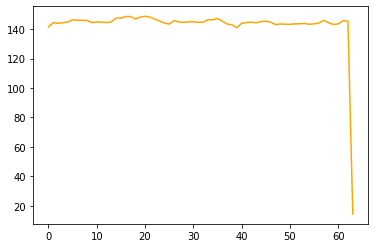

In [234]:
plt.plot(ticker_cluster["open"], color="orange")

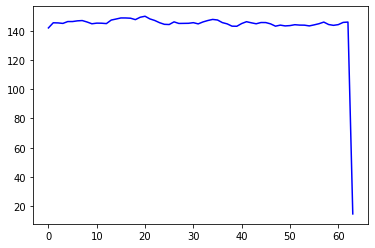

In [235]:
plt.plot(ticker_cluster["high"], color="blue")

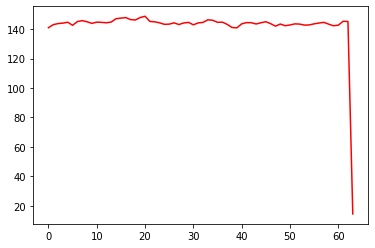

In [236]:
plt.plot(ticker_cluster["low"], color="red")

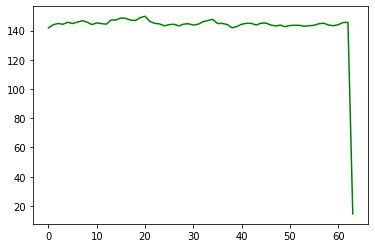

In [237]:
plt.plot(ticker_cluster["close"], color="green")

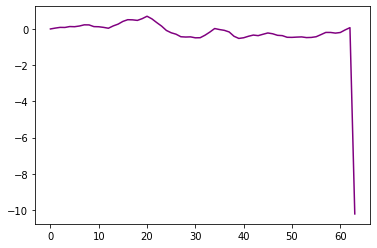

In [238]:
plt.plot(ticker_cluster["macd"], color="purple")

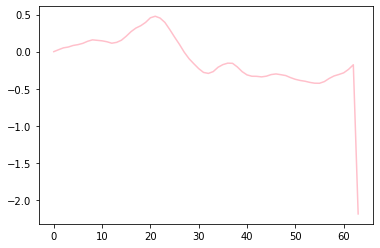

In [239]:
plt.plot(ticker_cluster["signal"], color="pink")

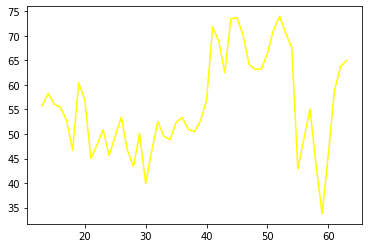

In [240]:
plt.plot(ticker_cluster["mfi"], color="yellow")

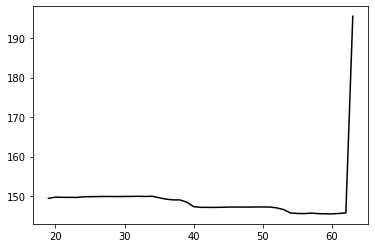

In [241]:
plt.plot(ticker_cluster["bb_up"], color="black")

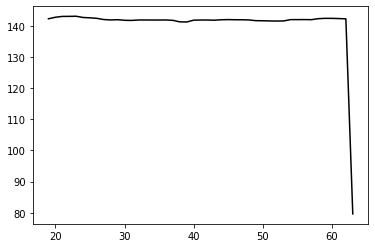

In [242]:
plt.plot(ticker_cluster["bb_low"], color="black")

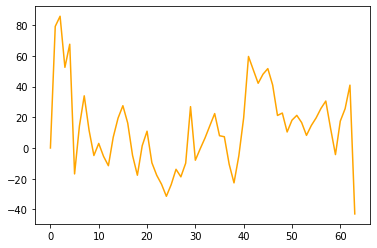

In [243]:
plt.plot(ticker_cluster["vzo"], color="orange")

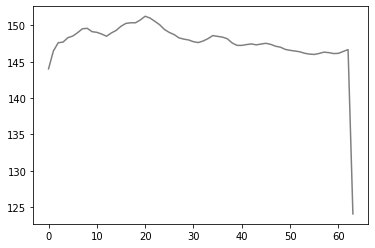

In [244]:
plt.plot(ticker_cluster["apz_u"], color="grey")

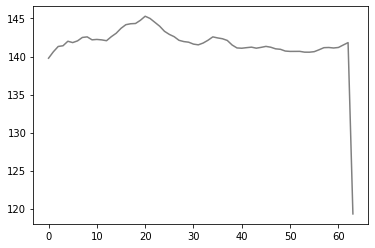

In [245]:
plt.plot(ticker_cluster["apz_l"], color="grey")

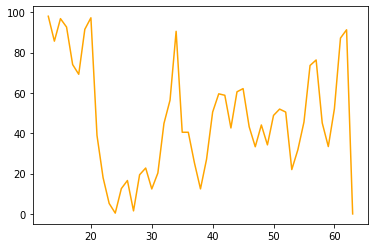

In [246]:
plt.plot(ticker_cluster["stoch"], color="orange")

In [247]:
# plt.plot(ticker_cluster["adx"], color="green")

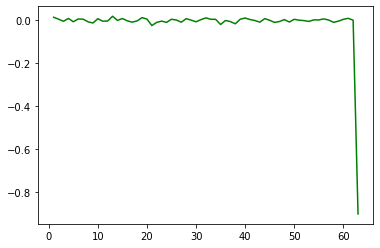

In [248]:
plt.plot(ticker_cluster["close"].pct_change(), color="green")

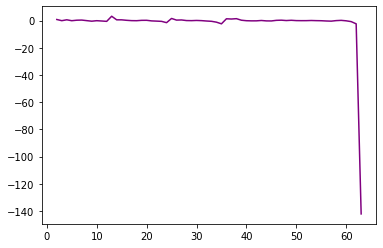

In [249]:
plt.plot(ticker_cluster["macd"].pct_change(), color="purple")

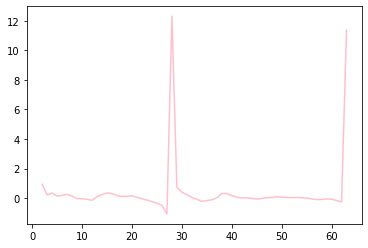

In [250]:
plt.plot(ticker_cluster["signal"].pct_change(), color="pink")

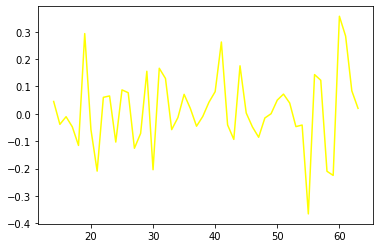

In [251]:
plt.plot(ticker_cluster["mfi"].pct_change(), color="yellow")

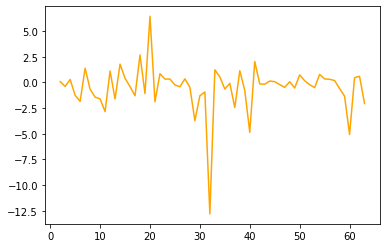

In [252]:
plt.plot(ticker_cluster["vzo"].pct_change(), color="orange")

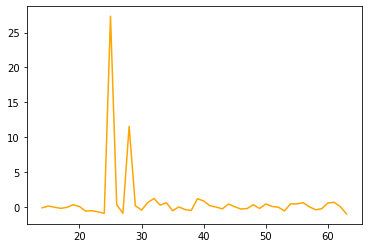

In [253]:
plt.plot(ticker_cluster["stoch"].pct_change(), color="orange")

In [254]:
# plt.plot(ticker_cluster["bb_up"].pct_change(), color="black")

In [255]:
# plt.plot(ticker_cluster["bb_low"].pct_change(), color="black")

In [256]:
# plt.plot(ticker_cluster["apz_u"].pct_change(), color="grey")

In [257]:
# plt.plot(ticker_cluster["apz_l"].pct_change(), color="grey")
vwap = indicators.get_vwap(minute_bars)

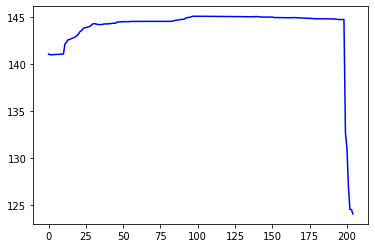

In [258]:
plt.plot(vwap, color="blue")

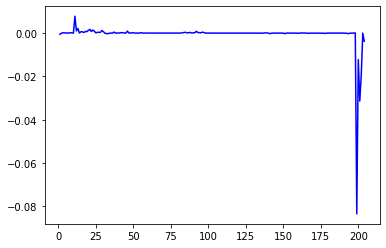

In [259]:
plt.plot(vwap.pct_change(), color="blue")

In [260]:
minute_macd = indicators.get_macd(minute_bars)

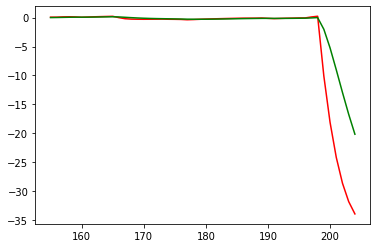

In [261]:
plt.plot(minute_macd["MACD"].iloc[-50:], color="red")
plt.plot(minute_macd["SIGNAL"].iloc[-50:], color="green")

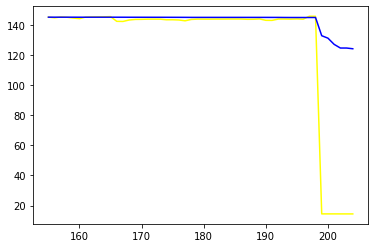

In [262]:
plt.plot(minute_bars["close"].iloc[-50:], color="yellow")
plt.plot(vwap.iloc[-50:], color="blue")

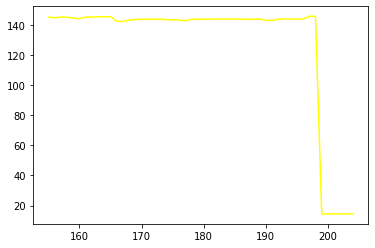

In [263]:
plt.plot(minute_bars["close"].iloc[-50:], color="yellow")